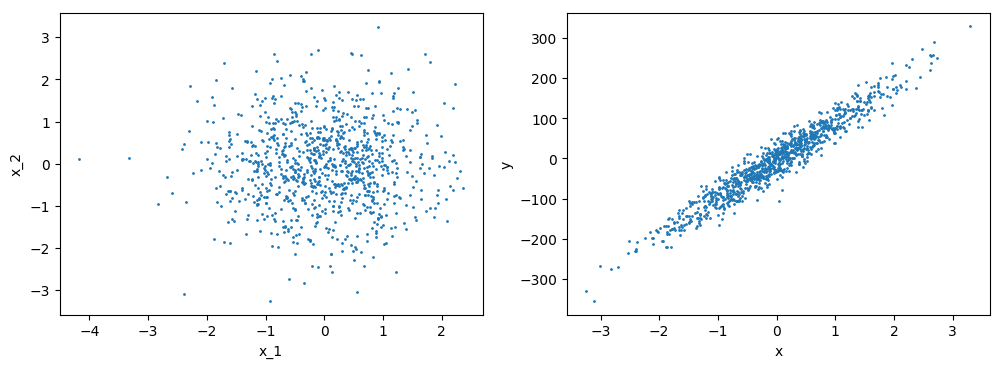

In [6]:
#LMS算法使用了随机梯度下降法作为其优化更新参数的方法
#有些时候随机梯度下降法也被不严谨的指代小批量梯度下降法,一般的，我们认为梯度下降法就是指批量梯度下降法

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b
#生成数据集，并可视化
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

num_train = 1000
num_test = 100

# 制作数据集,有两个属性组成
data = make_regression(n_samples=num_train, n_features=2)

# 可视化数据集
plt.figure(figsize=[12, 4], dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)

#PCA降维处理
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')

# 将数据集分割成为训练集与测试集
# 并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]



Text(0, 0.5, 'losses')

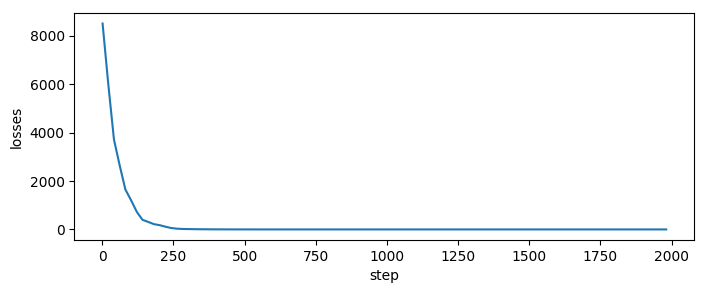

In [7]:
from sklearn.metrics import mean_squared_error as mse

train_steps = 2000    # 训练次数
lr =0.01                    # 学习率
summary_step = 20   # 摘要频率 
summary = []            # 摘要

W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值
for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    W = W - lr * dW
    db = -1 * (label - out)
    b = b - lr * db

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')


Text(0, 0.5, 'losses')

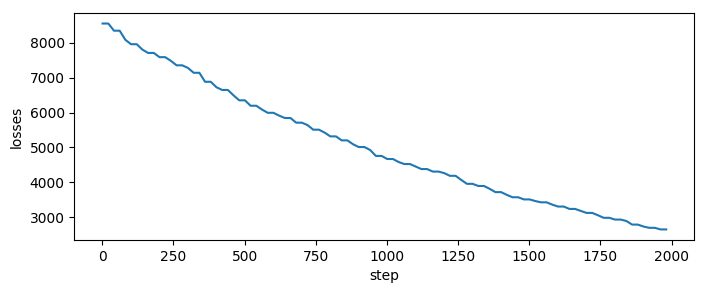

In [8]:
#将LMS算法改为使用小批量数据训练

from sklearn.metrics import mean_squared_error as mse

train_steps = 2000    # 训练次数
lr =0.01                    # 学习率
summary_step = 20   # 摘要频率 
summary = []            # 摘要

W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值

##############
tmp_w=0
tmp_b=0

for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数和偏置值
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    
    #计算tmp_w和tmp_b
    tmp_w=tmp_w+dW
    tmp_b=tmp_b+db
    
    #更新模型参数
    if i%32==31:
        W = W - lr * (tmp_w/32)
        b = b - lr * (tmp_b/32)
        tmp_w=0
        tmp_b=0
        
    

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')
